## Data Preparation and pre-processing

In [1]:
# importing the required libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading the dataset
data = pd.read_csv('nyc_taxi_trip_duration.csv')

# also creating a copy of the dataset
data_copy = data.copy(deep=True)

In [3]:
# looking at the head of the dataset to make sure it has been read properly
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [4]:
data.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
729317,id3905982,2,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.965919,40.789780,-73.952637,40.789181,N,296
729318,id0102861,1,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.996666,40.737434,-74.001320,40.731911,N,315
729319,id0439699,1,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.997849,40.761696,-74.001488,40.741207,N,673
729320,id2078912,1,2016-06-19 09:50:47,2016-06-19 09:58:14,1,-74.006706,40.708244,-74.013550,40.713814,N,447
729321,id1053441,2,2016-01-01 17:24:16,2016-01-01 17:44:40,4,-74.003342,40.743839,-73.945847,40.712841,N,1224


In [5]:
# shape of our dataset (number of records and number of columns)
data.shape

(729322, 11)

In [6]:
# columns that we have in our dataset
data.columns.tolist()

['id',
 'vendor_id',
 'pickup_datetime',
 'dropoff_datetime',
 'passenger_count',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'store_and_fwd_flag',
 'trip_duration']

In [7]:
# data type of each column
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [8]:
# number of unique values in each column
data.nunique()

id                    729322
vendor_id                  2
pickup_datetime       709359
dropoff_datetime      709308
passenger_count            9
pickup_longitude       19729
pickup_latitude        39776
dropoff_longitude      27892
dropoff_latitude       53579
store_and_fwd_flag         2
trip_duration           6296
dtype: int64

In [9]:
# missing value % in each column
data.isnull().mean()*100

id                    0.0
vendor_id             0.0
pickup_datetime       0.0
dropoff_datetime      0.0
passenger_count       0.0
pickup_longitude      0.0
pickup_latitude       0.0
dropoff_longitude     0.0
dropoff_latitude      0.0
store_and_fwd_flag    0.0
trip_duration         0.0
dtype: float64

There are no missing values in the dataset

In [10]:
# looking for duplicates in the dataset
data.duplicated(subset=data.columns.tolist()[1:]).sum()

0

There are no duplicates in the dataset

In [11]:
# changing pickup and dropoff datetime columns to datetime values
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data['dropoff_datetime'] = pd.to_datetime(data['dropoff_datetime'])

# creating separate variables for month, date, and hour of pickup
data['pickup_year'] = data['pickup_datetime'].dt.year
data['pickup_month'] = data['pickup_datetime'].dt.month
data['pickup_date'] = data['pickup_datetime'].dt.day
data['pickup_dow'] = data['pickup_datetime'].dt.weekday
data['pickup_hour'] = data['pickup_datetime'].dt.hour

# creating separate variables for month, date, and hour of drop
data['dropoff_year'] = data['dropoff_datetime'].dt.year
data['dropoff_month'] = data['dropoff_datetime'].dt.month
data['dropoff_date'] = data['dropoff_datetime'].dt.day
data['dropoff_dow'] = data['dropoff_datetime'].dt.weekday
data['dropoff_hour'] = data['dropoff_datetime'].dt.hour

# dropping the pickup and dropoff datetime columns
data.drop(columns=['pickup_datetime', 'dropoff_datetime'], inplace=True)

In [12]:
# mapping Y and N values in store_and_fwd_flag column to 0 and 1
data['store_and_fwd_flag'] = data['store_and_fwd_flag'].map({'N': 0, 'Y':1})

In [13]:
# creating a variable for difference between pickup and dropoff coordinates
data['distance']=abs(data.pickup_longitude-data.dropoff_longitude)+abs(data.pickup_latitude-data.dropoff_latitude)

In [14]:
# having a look at the dataset after above changes
data.head()

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_year,pickup_month,pickup_date,pickup_dow,pickup_hour,dropoff_year,dropoff_month,dropoff_date,dropoff_dow,dropoff_hour,distance
0,id1080784,2,1,-73.953918,40.778873,-73.963875,40.771164,0,400,2016,2,29,0,16,2016,2,29,0,16,0.017666
1,id0889885,1,2,-73.988312,40.731743,-73.994751,40.694931,0,1100,2016,3,11,4,23,2016,3,11,4,23,0.043251
2,id0857912,2,2,-73.997314,40.721458,-73.948029,40.774918,0,1635,2016,2,21,6,17,2016,2,21,6,18,0.102745
3,id3744273,2,6,-73.961670,40.759720,-73.956779,40.780628,0,1141,2016,1,5,1,9,2016,1,5,1,10,0.025799
4,id0232939,1,1,-74.017120,40.708469,-73.988182,40.740631,0,848,2016,2,17,2,6,2016,2,17,2,6,0.061100


In [15]:
# final check of the data types of newly created variables
data.dtypes

id                     object
vendor_id               int64
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag      int64
trip_duration           int64
pickup_year             int64
pickup_month            int64
pickup_date             int64
pickup_dow              int64
pickup_hour             int64
dropoff_year            int64
dropoff_month           int64
dropoff_date            int64
dropoff_dow             int64
dropoff_hour            int64
distance              float64
dtype: object

## Univariate Analysis

We can automate the process of EDA using the sweetviz library, which will generate an HTML report of all variables

In [16]:
# importing sweetviz library for generating EDA report
import sweetviz as sv

In [17]:
report = sv.analyze(data)
report.show_html()

                                             |                                                                …

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


We will also go through each variable manually

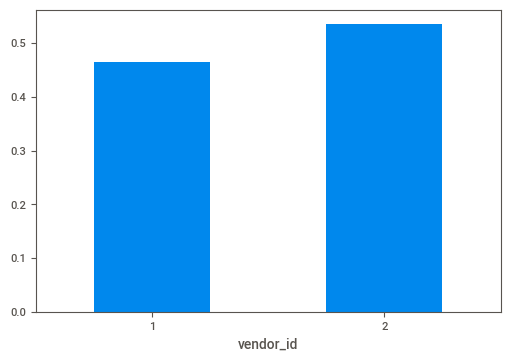

In [18]:
data.vendor_id.value_counts(normalize=True).sort_index().plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('vendor_id');

More rides have been booked through vendor 2

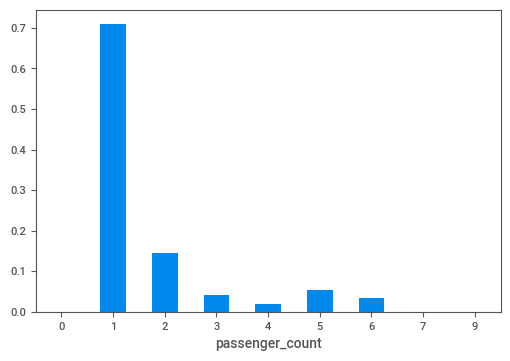

In [19]:
data.passenger_count.value_counts(normalize=True).sort_index().plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('passenger_count');

Most of the rides have 1 passenger

0, 7, and 9 are the least frequent categories

In [20]:
data.pickup_longitude.describe()

count    729322.000000
mean        -73.973513
std           0.069754
min        -121.933342
25%         -73.991859
50%         -73.981758
75%         -73.967361
max         -65.897385
Name: pickup_longitude, dtype: float64

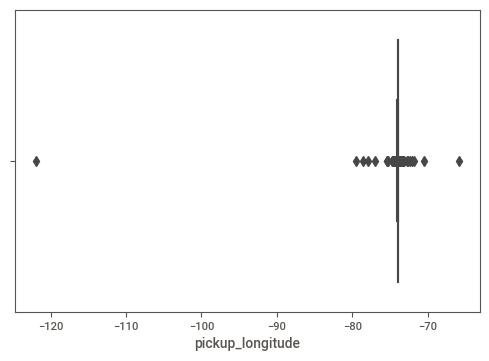

In [21]:
sns.boxplot(x=data.pickup_longitude);

New York City longitude is -74 degrees. So we need to remove those values that are less than -74.5 and more than -73.5

In [22]:
# number of records that satisfy this criteria
len(data.loc[(data.pickup_longitude < -74.5) | (data.pickup_longitude > -73.5)].index.tolist())

34

In [23]:
# dropping the records that satify this criteria
data.drop(data.loc[(data.pickup_longitude < -74.5) | (data.pickup_longitude > -73.5)].index, inplace=True)

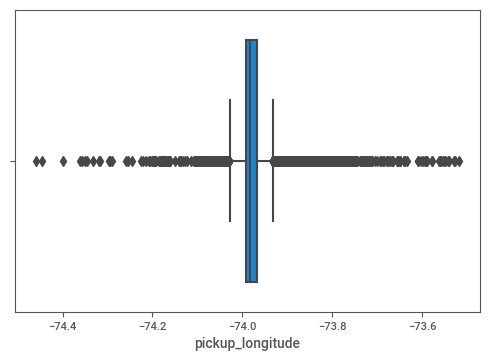

In [24]:
sns.boxplot(x=data.pickup_longitude);

Although there still seem to be a lot of outlier values, we will continue to keep them in the dataset assuming these are trips to places around New York

In [25]:
data.pickup_latitude.describe()

count    729288.000000
mean         40.750924
std           0.028343
min          40.298828
25%          40.737335
50%          40.754070
75%          40.768314
max          43.486885
Name: pickup_latitude, dtype: float64

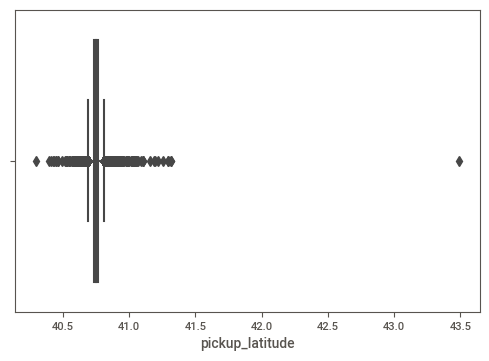

In [26]:
sns.boxplot(x=data.pickup_latitude);

New York City longitude is 40.7 degrees. So we need to remove those values that are less than 40.2 and more than 41.2

In [27]:
# number of records that satisfy this criteria
len(data.loc[(data.pickup_latitude < 40.2) | (data.pickup_latitude > 41.2)].index.tolist())

7

In [28]:
# dropping the records that satify this criteria
data.drop(data.loc[(data.pickup_latitude < 40.2) | (data.pickup_latitude > 41.2)].index, inplace=True)

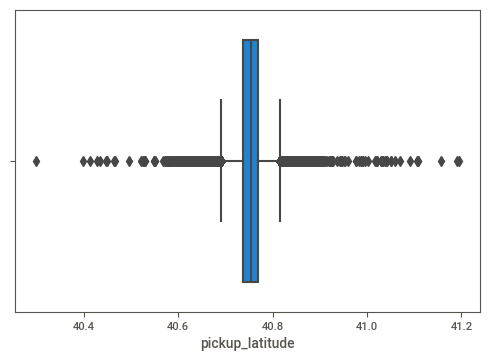

In [29]:
sns.boxplot(x=data.pickup_latitude);

Although there still seem to be a lot of outlier values, we will continue to keep them in the dataset assuming these are trips to places around New York

In [30]:
data.dropoff_longitude.describe()

count    729281.000000
mean        -73.973366
std           0.037675
min         -79.817978
25%         -73.991318
50%         -73.979759
75%         -73.963036
max         -72.671150
Name: dropoff_longitude, dtype: float64

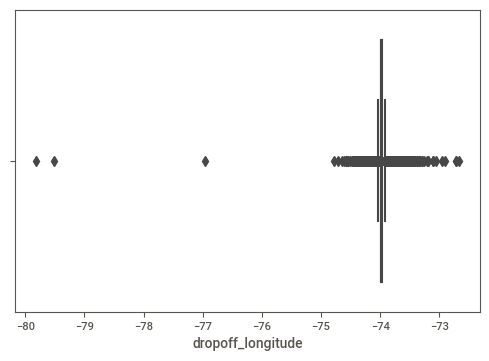

In [31]:
sns.boxplot(x=data.dropoff_longitude);

Although data seems to contain a few outliers, we will continue to keep them in the dataset for now

In [32]:
data.dropoff_latitude.describe()

count    729281.000000
mean         40.751789
std           0.032849
min          38.478298
25%          40.735931
50%          40.754509
75%          40.769737
max          43.921028
Name: dropoff_latitude, dtype: float64

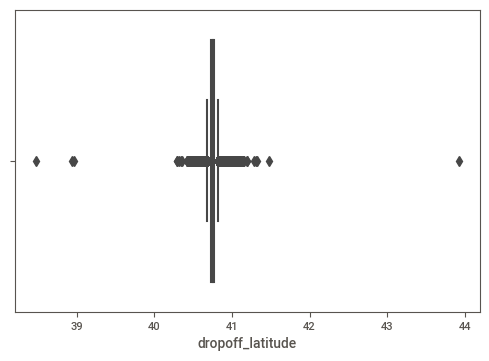

In [33]:
sns.boxplot(x=data.dropoff_latitude);

Although data seems to contain a few outliers, we will continue to keep them in the dataset for now

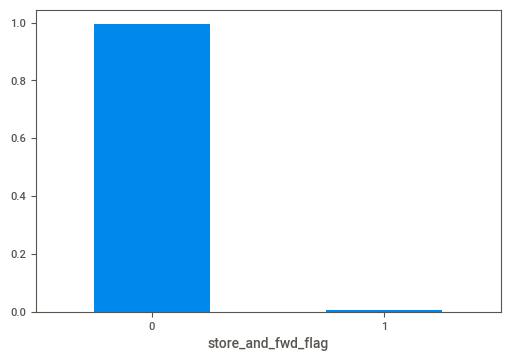

In [34]:
data.store_and_fwd_flag.value_counts(normalize=True).plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('store_and_fwd_flag');

In [35]:
data.store_and_fwd_flag.value_counts(normalize=True)*100

0    99.446167
1     0.553833
Name: store_and_fwd_flag, dtype: float64

Almost all records have store_and_fwd_flag value as zero. We will drop this variable because it will not add any value to our analysis

In [36]:
# dropping the store_and_fwd_flag column
data.drop(columns='store_and_fwd_flag', inplace=True)

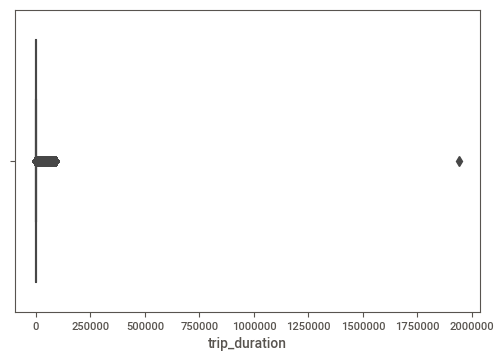

In [37]:
sns.boxplot(x=data.trip_duration);

Clearly the maximum value is too large. We will drop that record and then look at the data

In [38]:
# dropping the record with the largest value
data.drop(data.loc[data.trip_duration == data.trip_duration.max()].index, inplace=True)

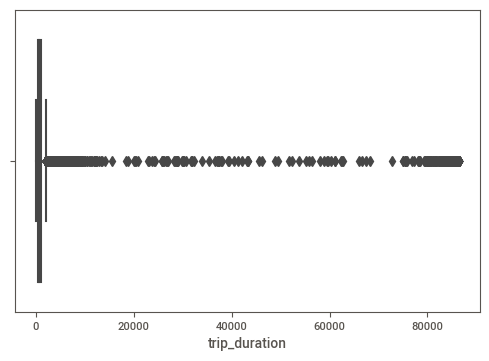

In [39]:
sns.boxplot(x=data.trip_duration);

There seem to be a lot of outlier values in this data. We will drop all those records where trip duration is more than 6 hours i.e. 21600 seconds

In [40]:
# number of records that satify this criteria
len(data.loc[data.trip_duration > 21600].index.tolist())

1006

In [41]:
# dropping the records that satify this criteria
data.drop(data.loc[data.trip_duration > 21600].index, inplace=True)

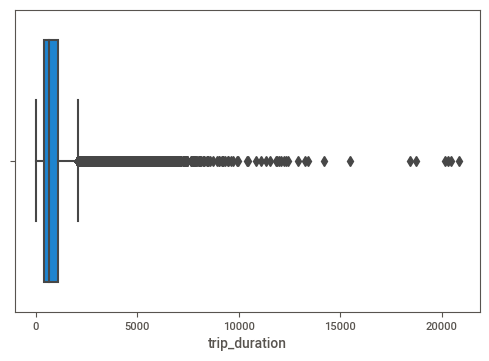

In [42]:
sns.boxplot(x=data.trip_duration);

Data looks much better now

In [43]:
data.pickup_year.value_counts(normalize=True)*100

2016    100.0
Name: pickup_year, dtype: float64

All records are from 2016, so we will drop this feature

In [44]:
# dropping the pickup_year column
data.drop(columns='pickup_year', inplace=True)

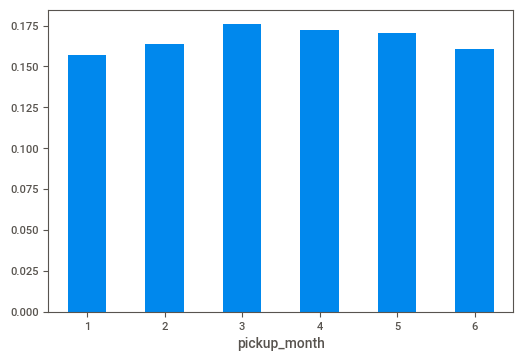

In [45]:
data.pickup_month.value_counts(normalize=True).sort_index().plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('pickup_month');

Number of trips are fairly evenly distributed throughout the 6 months

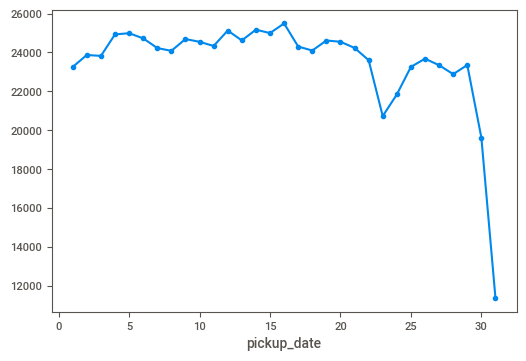

In [46]:
data.pickup_date.value_counts().sort_index().plot(kind='line', marker='o')
plt.xlabel('pickup_date');

Number of trips seem to drop off in the second half of the month

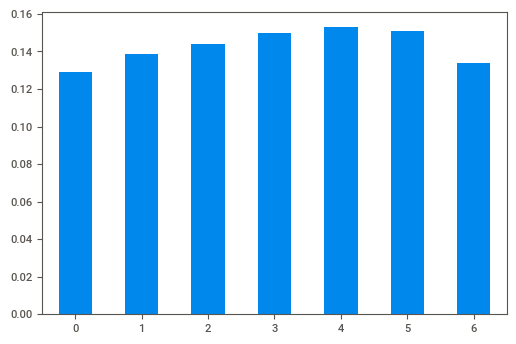

In [47]:
data.pickup_dow.value_counts(normalize=True).sort_index().plot(kind='bar')
plt.xticks(rotation=0);

Number of trips increase from Monday to Saturday, and then drop on Sunday

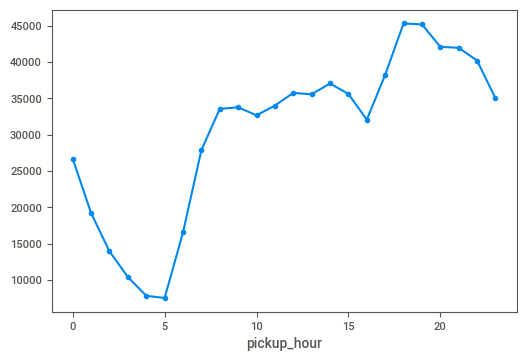

In [48]:
data.pickup_hour.value_counts().sort_index().plot(kind='line', marker='o')
plt.xlabel('pickup_hour');

Number of rides are the least during late night and early morning hours (12AM-6AM)

Number of rides seem to pick up after 5 AM, and peak during the evening (5PM-8 PM)

In [49]:
data.dropoff_year.value_counts(normalize=True)*100

2016    100.0
Name: dropoff_year, dtype: float64

All records are from 2016, so we will drop this feature

In [50]:
# dropping the dropoff_year column
data.drop(columns='dropoff_year', inplace=True)

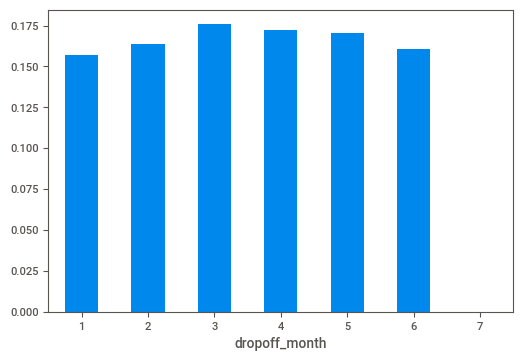

In [51]:
data.dropoff_month.value_counts(normalize=True).sort_index().plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('dropoff_month');

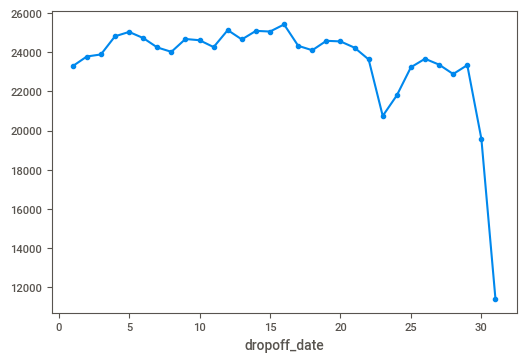

In [52]:
data.dropoff_date.value_counts().sort_index().plot(kind='line', marker='o')
plt.xlabel('dropoff_date');

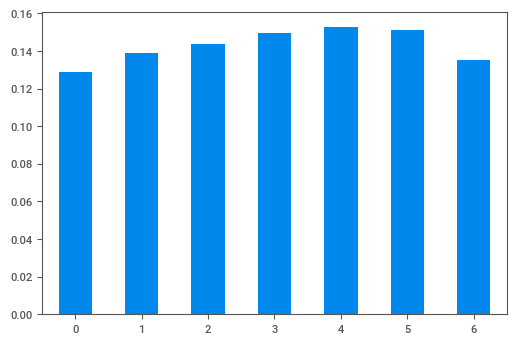

In [53]:
data.dropoff_dow.value_counts(normalize=True).sort_index().plot(kind='bar')
plt.xticks(rotation=0);

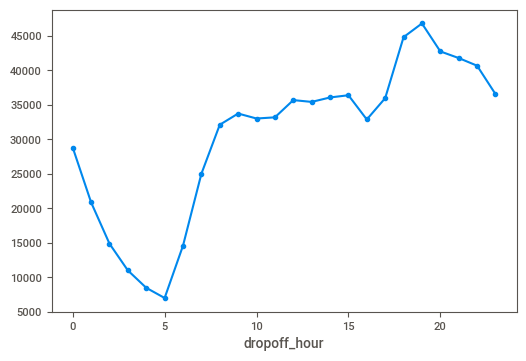

In [54]:
data.dropoff_hour.value_counts().sort_index().plot(kind='line', marker='o')
plt.xlabel('dropoff_hour');

In [55]:
data.distance.describe()

count    728274.000000
mean          0.045842
std           0.057434
min           0.000000
25%           0.016106
50%           0.027401
75%           0.050499
max           8.698296
Name: distance, dtype: float64

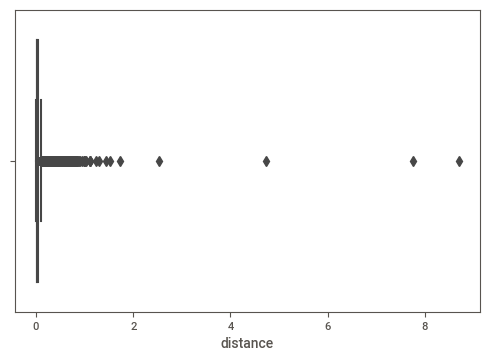

In [56]:
sns.boxplot(x=data.distance);

Although it looks like there are a lot of outliers in this data, we will keep all records for now

In [57]:
data.trip_duration.describe()

count    728274.000000
mean        837.101794
std         661.250728
min           1.000000
25%         397.000000
50%         662.000000
75%        1073.000000
max       20828.000000
Name: trip_duration, dtype: float64

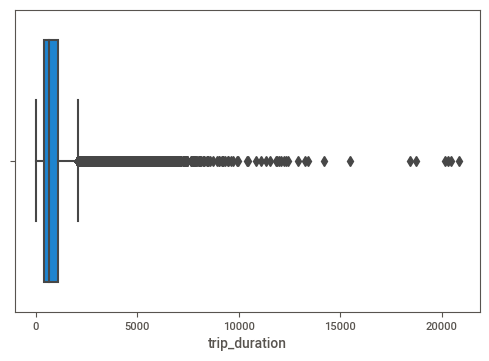

In [58]:
sns.boxplot(x=data.trip_duration);

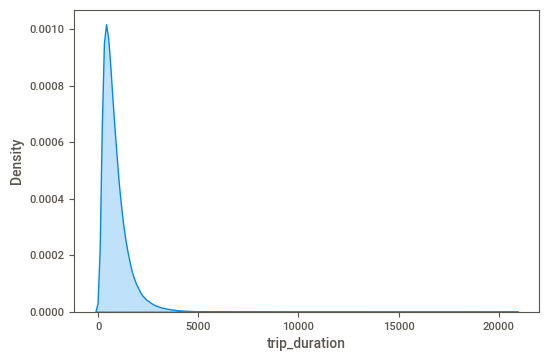

In [59]:
sns.kdeplot(data.trip_duration, shade=True);

## Bivariate Analysis

In [60]:
data.groupby('vendor_id')['trip_duration'].mean()

vendor_id
1    830.931850
2    842.469359
Name: trip_duration, dtype: float64

Trip duration is ~ 12 seconds more in case of rides booked through vendor 2

In [61]:
data.groupby('passenger_count')['trip_duration'].agg(['count', 'mean'])

,count,mean
passenger_count,,
0,33,403.969697
1,516793,825.059335
2,104938,878.618756
3,29633,868.849087
4,14027,884.086690
5,38812,843.087086
6,24036,839.182601
7,1,19.000000
9,1,560.000000


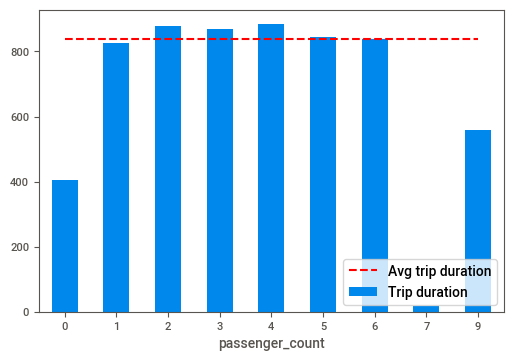

In [62]:
data.groupby('passenger_count')['trip_duration'].mean().plot(kind='bar', label='Trip duration')
plt.plot([data.trip_duration.mean()]*data.passenger_count.nunique(), 'r--', label='Avg trip duration')
plt.xticks(rotation=0)
plt.legend();

passenger_count 0, 7, and 9 are very less frequent

Categories 1-6 have trip duration more or less around the average trip duration

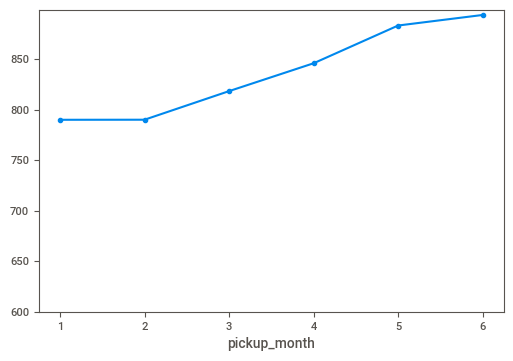

In [63]:
data.groupby('pickup_month')['trip_duration'].mean().plot(marker='o')
plt.ylim(600);

Trip duration has increased over the months

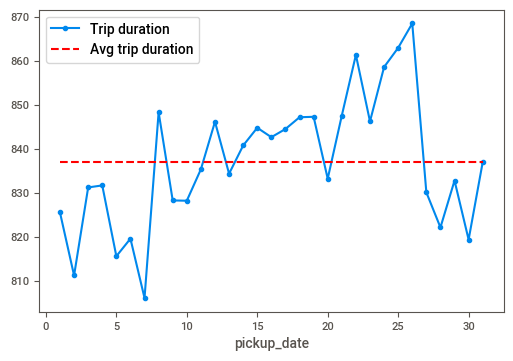

In [64]:
data.groupby('pickup_date')['trip_duration'].mean().plot(marker='o', label='Trip duration')
plt.plot(data.groupby('pickup_date')['trip_duration'].mean().index, [data.trip_duration.mean()]*data.pickup_date.nunique(), 'r--', label='Avg trip duration');
plt.legend();

Trip duration is varying quite a lot with pickup date

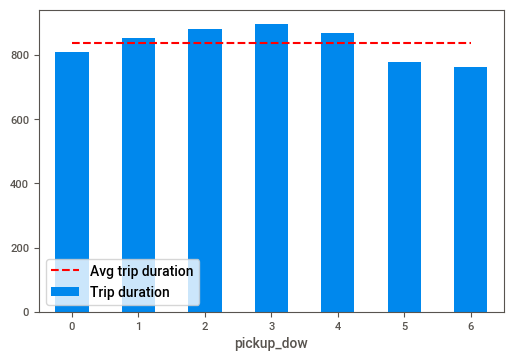

In [65]:
data.groupby('pickup_dow')['trip_duration'].mean().plot(kind='bar', label='Trip duration')
plt.plot([data.trip_duration.mean()]*data.pickup_dow.nunique(), 'r--', label='Avg trip duration')
plt.xticks(rotation=0)
plt.legend();

Trip duration during weekends is lesser than average

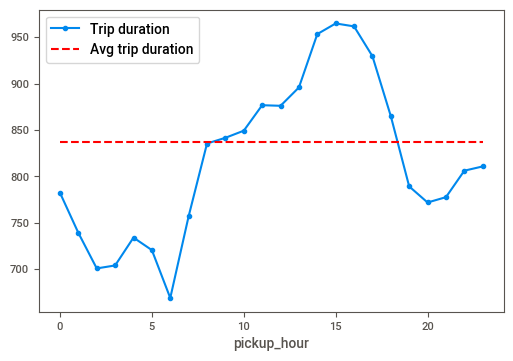

In [66]:
data.groupby('pickup_hour')['trip_duration'].mean().plot(marker='o', label='Trip duration')
plt.plot(data.groupby('pickup_hour')['trip_duration'].mean().index, [data.trip_duration.mean()]*data.pickup_hour.nunique(), 'r--', label='Avg trip duration');
plt.legend();

Trip duration in early morning trips is much less

Trip duration starts picking up after 6 AM, and peak around 2-6 PM

Dropoff and pickup date time variables are strongly related. So we will only look at dropoff_hour

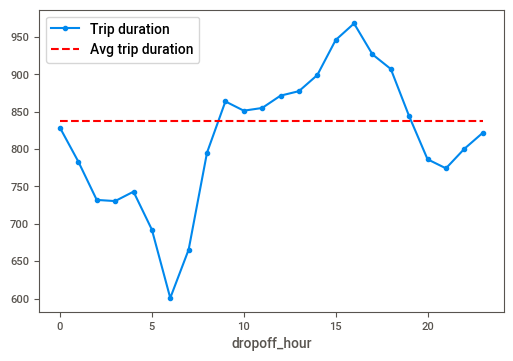

In [67]:
data.groupby('dropoff_hour')['trip_duration'].mean().plot(marker='o', label='Trip duration')
plt.plot(data.groupby('dropoff_hour')['trip_duration'].mean().index, [data.trip_duration.mean()]*data.dropoff_hour.nunique(), 'r--', label='Avg trip duration');
plt.legend();

Dropoff hour plot looks very similar to pickup hour plot

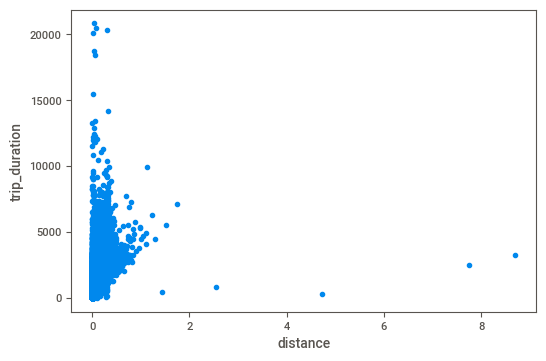

In [68]:
plt.scatter(data.distance, data.trip_duration)
plt.xlabel('distance')
plt.ylabel('trip_duration');

## Multivariate Analysis

In [69]:
data['pickup_hour_cat'] = 'str'
data['pickup_hour_cat'] = np.where(data['pickup_hour'].isin([0, 1, 2, 3]), 'Late Night', data['pickup_hour_cat'])
data['pickup_hour_cat'] = np.where(data['pickup_hour'].isin([4, 5, 6, 7]), 'Early Morning', data['pickup_hour_cat'])
data['pickup_hour_cat'] = np.where(data['pickup_hour'].isin([8, 9, 10, 11]), 'Morning', data['pickup_hour_cat'])
data['pickup_hour_cat'] = np.where(data['pickup_hour'].isin([12, 13, 14, 15]), 'Afternoon', data['pickup_hour_cat'])
data['pickup_hour_cat'] = np.where(data['pickup_hour'].isin([16, 17, 18, 19]), 'Evening', data['pickup_hour_cat'])
data['pickup_hour_cat'] = np.where(data['pickup_hour'].isin([20, 21, 22, 23]), 'Night', data['pickup_hour_cat'])

In [70]:
data['dropoff_hour_cat'] = 'str'
data['dropoff_hour_cat'] = np.where(data['dropoff_hour'].isin([0, 1, 2, 3]), 'Late Night', data['dropoff_hour_cat'])
data['dropoff_hour_cat'] = np.where(data['dropoff_hour'].isin([4, 5, 6, 7]), 'Early Morning', data['dropoff_hour_cat'])
data['dropoff_hour_cat'] = np.where(data['dropoff_hour'].isin([8, 9, 10, 11]), 'Morning', data['dropoff_hour_cat'])
data['dropoff_hour_cat'] = np.where(data['dropoff_hour'].isin([12, 13, 14, 15]), 'Afternoon', data['dropoff_hour_cat'])
data['dropoff_hour_cat'] = np.where(data['dropoff_hour'].isin([16, 17, 18, 19]), 'Evening', data['dropoff_hour_cat'])
data['dropoff_hour_cat'] = np.where(data['dropoff_hour'].isin([20, 21, 22, 23]), 'Night', data['dropoff_hour_cat'])

In [71]:
data.groupby(['pickup_hour_cat', 'pickup_dow'])['trip_duration'].mean().unstack()

pickup_dow,0,1,2,3,4,5,6
pickup_hour_cat,,,,,,,
Afternoon,882.765145,955.290900,1013.238624,1014.769822,976.696084,801.272860,820.382981
Early Morning,754.563976,710.991716,720.125348,721.034906,741.633937,702.111719,713.109403
Evening,805.989969,874.823411,933.904133,949.569631,908.197466,833.284642,834.337041
Late Night,706.445545,710.031636,708.529663,722.100825,752.094322,763.307842,753.071984
Morning,876.637528,929.951632,919.608938,931.518098,896.134339,666.549966,629.604244
Night,725.122315,766.158272,793.722625,839.841082,823.567291,808.139577,738.944304


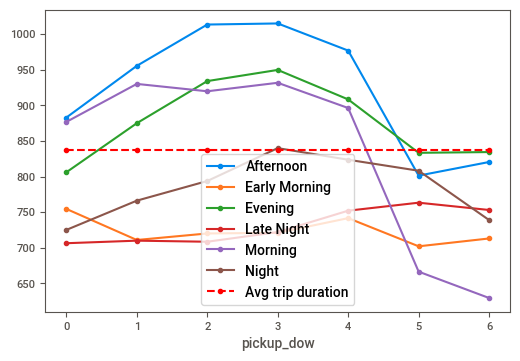

In [72]:
data.groupby(['pickup_hour_cat', 'pickup_dow'])['trip_duration'].mean().unstack().T.plot(marker='o')
plt.plot([data.trip_duration.mean()]*data.pickup_dow.nunique(), 'r--o', label='Avg trip duration')
plt.legend(loc='lower center');

Afternoon trips are the longest on average

During weekend, trip durations are lesser than average

Morning trips are longer in duration during weekdays but smaller during weekends (because weekends are generally off)

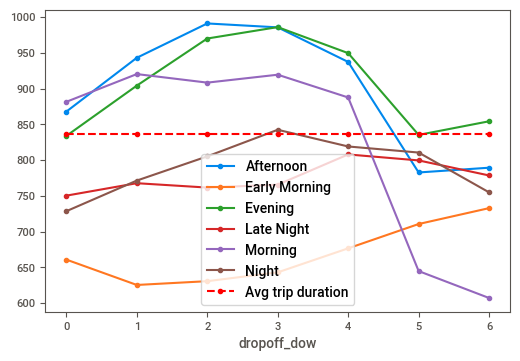

In [73]:
data.groupby(['dropoff_hour_cat', 'dropoff_dow'])['trip_duration'].mean().unstack().T.plot(marker='o')
plt.plot([data.trip_duration.mean()]*data.pickup_dow.nunique(), 'r--o', label='Avg trip duration')
plt.legend(loc='lower center');

Dropoff plot looks very similar to pickup plot

## Correlation Heatmap

In [74]:
# correlation between variables
corr = data.corr()

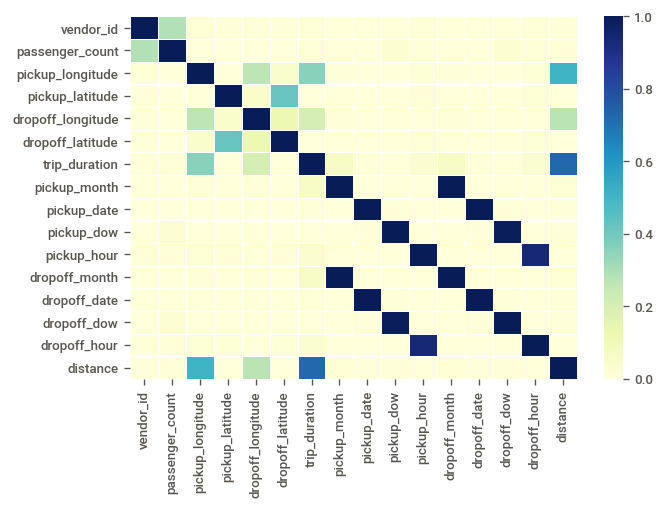

In [75]:
# heatmap of correlation coefficients
plt.figure(dpi=120)
sns.heatmap(corr, vmin=0, cmap='YlGnBu', linewidth=0.5);

Pickup and dropoff date and time variables are highly correlated

Pickup and dropoff latitude and longitude variables are slightly correlated

Distance and pickup and dropoff longitude are slightly correlated

Other variables are very less correlated, which is a good thing from a modeling perspective